# Explore here

# this is logistic regression mahine learning project

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)#bütün columns ları gösterito
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=413&path=bank-marketing-campaign-data.csv",sep=';')

main_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
main_df.shape

(41188, 21)

In [4]:
#main_df = main_df.rename(columns={'y': 'target'})
#isim değiştirme

In [5]:
#how many people are yes or no in dataset
main_df['y'].value_counts(normalize=True)# normalize yüzdelik veriyo

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [6]:
main_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

# lets explore data

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
main_df.isna().sum().sum()

np.int64(0)

In [9]:
main_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


correlations and heatmaps

'\nBu kod, seçilen 6 sütunun birbirleriyle olan \nkorelasyonunu görsel olarak küçük bir ısı haritası şeklinde gösterir.'

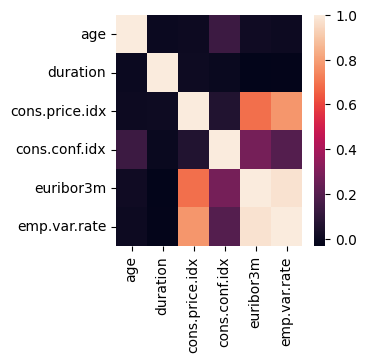

In [10]:
plt.figure(figsize=(3,3))
sns.heatmap(main_df[['age','duration', "cons.price.idx",'cons.conf.idx', 'euribor3m','emp.var.rate']].corr())

"""
Bu kod, seçilen 6 sütunun birbirleriyle olan 
korelasyonunu görsel olarak küçük bir ısı haritası şeklinde gösterir."""

In [11]:
def job_maker(x):
    if x in ['admin.', 'blue-collar','technician']:
        return x
    else: return "other"

main_df['job'] = main_df['job'].apply(job_maker)

<Axes: xlabel='emp.var.rate', ylabel='euribor3m'>

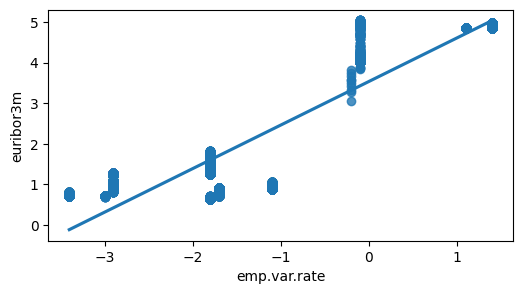

In [12]:
plt.figure(figsize=(6,3))
sns.regplot(data=main_df,x='emp.var.rate',y='euribor3m')

In [13]:
main_df.groupby('y').describe()

age                                                     duration  \
       count       mean        std   min   25%   50%   75%   max    count   
y                                                                           
no   36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0  36548.0   
yes   4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0   4640.0   

                                                                campaign  \
           mean         std   min    25%    50%     75%     max    count   
y                                                                          
no   220.844807  207.096293   0.0   95.0  163.5  279.00  4918.0  36548.0   
yes  553.191164  401.171871  37.0  253.0  449.0  741.25  4199.0   4640.0   

                                                     pdays              \
         mean       std  min  25%  50%  75%   max    count        mean   
y                                                                        
no   2.633085  2.873438  1.0  1.0  2.0  3.0  56.0  36548.0  984.113878   
yes  2.051724  1.666245  1.0  1.0  2.0  2.0  23.0   4640.0  792.035560   

                                                 previous                      \
            std  min    25%    50%    75%    max    count      mean       std   
y                                                                               
no   120.656868  0.0  999.0  999.0  999.0  999.0  36548.0  0.132374  0.409199   
yes  403.407181  0.0  999.0  999.0  999.0  999.0   4640.0  0.492672  0.860344   

                             emp.var.rate                                     \
     min  25%  50%  75%  max        count      mean       std  min  25%  50%   
y                                                                              
no   0.0  0.0  0.0  0.0  7.0      36548.0  0.248875  1.482932 -3.4 -1.8  1.1   
yes  0.0  0.0  0.0  1.0  6.0       4640.0 -1.233448  1.623626 -3.4 -1.8 -1.8   

              cons.price.idx                                               \
     75%  max          count       mean       std     min     25%     50%   
y                                                                           
no   1.4  1.4        36548.0  93.603757  0.558993  92.201  93.075  93.918   
yes -0.1  1.4         4640.0  93.354386  0.676644  92.201  92.893  93.200   

                    cons.conf.idx                                         \
        75%     max         count       mean       std   min   25%   50%   
y                                                                          
no   93.994  94.767       36548.0 -40.593097  4.391155 -50.8 -42.7 -41.8   
yes  93.918  94.767        4640.0 -39.789784  6.139668 -50.8 -46.2 -40.4   

                euribor3m                                                  \
      75%   max     count      mean       std    min    25%    50%    75%   
y                                                                           
no  -36.4 -26.9   36548.0  3.811491  1.638187  0.634  1.405  4.857  4.962   
yes -36.1 -26.9    4640.0  2.123135  1.742598  0.634  0.849  1.266  4.406   

           nr.employed                                                  \
       max       count         mean        std     min     25%     50%   
y                                                                        
no   5.045     36548.0  5176.166600  64.571979  4963.6  5099.1  5195.8   
yes  5.045      4640.0  5095.115991  87.572641  4963.6  5017.5  5099.1   

                     
        75%     max  
y                    
no   5228.1  5228.1  
yes  5191.0  5228.1

In [14]:
main_df[main_df['y']=='no'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='age', ylabel='duration'>

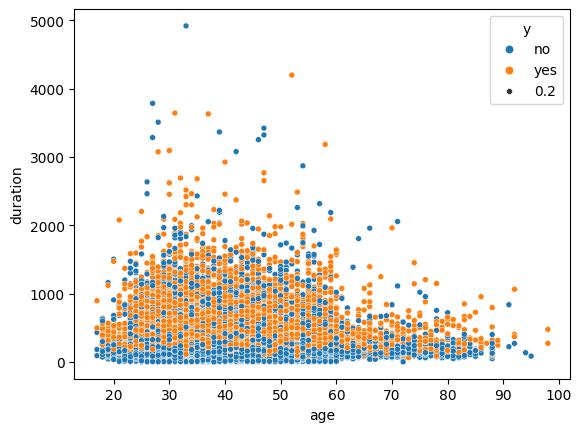

In [15]:
sns.scatterplot(data=main_df, x='age',y='duration',hue='y',size=0.2)

 IT LOOKS like customers who were contacted between 2 and 4 times(in the previous campaign) had a success rate of approximantely 40%

In [16]:
main_df.groupby('previous')['poutcome'].value_counts(normalize=True).reset_index()


,previous,poutcome,proportion
0,0,nonexistent,1.000000
1,1,failure,0.810349
2,1,success,0.189651
3,2,failure,0.575597
4,2,success,0.424403
5,3,success,0.592593
6,3,failure,0.407407
7,4,success,0.571429
8,4,failure,0.428571
9,5,success,0.833333


In [17]:
main_df['age'].min()

np.int64(17)

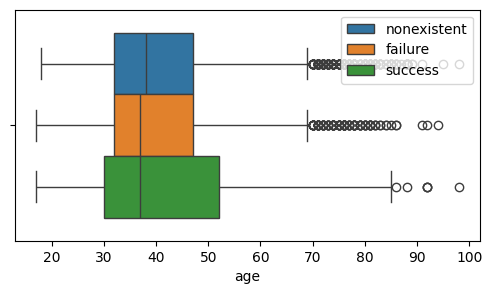

In [18]:
plt.figure(figsize=(6,3))
sns.boxplot(data=main_df,x='age',hue='poutcome')
plt.legend(loc='upper right')

<Axes: xlabel='age', ylabel='Count'>

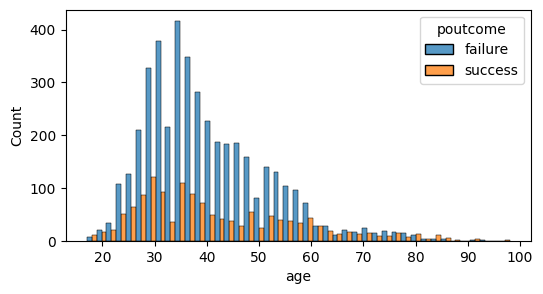

In [19]:
plt.figure(figsize=(6,3))
sns.histplot(data=main_df[main_df['poutcome']!='nonexistent'],x='age',hue = 'poutcome'
             ,multiple='dodge')

In [20]:
day_order = ["mon","tue","wed","thu","fri"]
temp_df=main_df.groupby('day_of_week')['duration'].mean().reset_index()
temp_df['day_of_week']=temp_df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})
temp_df.sort_values('day_of_week').reset_index(drop=True)
"""
Günlere göre ortalama süreyi alır.

Günleri sıralamak için sayıya çevirir.

Doğru sırada tablo oluşturur.
"""
temp_df

,day_of_week,duration
0,5,252.748818
1,1,246.568358
2,4,265.674591
3,2,260.455995
4,3,265.883206


In [21]:
round(main_df[main_df['poutcome']!='nonexistent'].groupby(['day_of_week','poutcome'])['duration'].mean())

day_of_week  poutcome
fri          failure     252.0
             success     310.0
mon          failure     229.0
             success     324.0
thu          failure     258.0
             success     325.0
tue          failure     247.0
             success     337.0
wed          failure     255.0
             success     305.0
Name: duration, dtype: float64

In [22]:
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,other,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
main_df.groupby('previous')['poutcome'].value_counts(normalize=True)

previous  poutcome   
0         nonexistent    1.000000
1         failure        0.810349
          success        0.189651
2         failure        0.575597
          success        0.424403
3         success        0.592593
          failure        0.407407
4         success        0.571429
          failure        0.428571
5         success        0.833333
          failure        0.166667
6         success        0.800000
          failure        0.200000
7         success        1.000000
Name: proportion, dtype: float64

In [24]:
main_df.groupby('education')['y'].value_counts(normalize=True)

education            y  
basic.4y             no     0.897510
                     yes    0.102490
basic.6y             no     0.917976
                     yes    0.082024
basic.9y             no     0.921754
                     yes    0.078246
high.school          no     0.891645
                     yes    0.108355
illiterate           no     0.777778
                     yes    0.222222
professional.course  no     0.886515
                     yes    0.113485
university.degree    no     0.862755
                     yes    0.137245
unknown              no     0.854997
                     yes    0.145003
Name: proportion, dtype: float64

# it looks like age difrences to yes and no

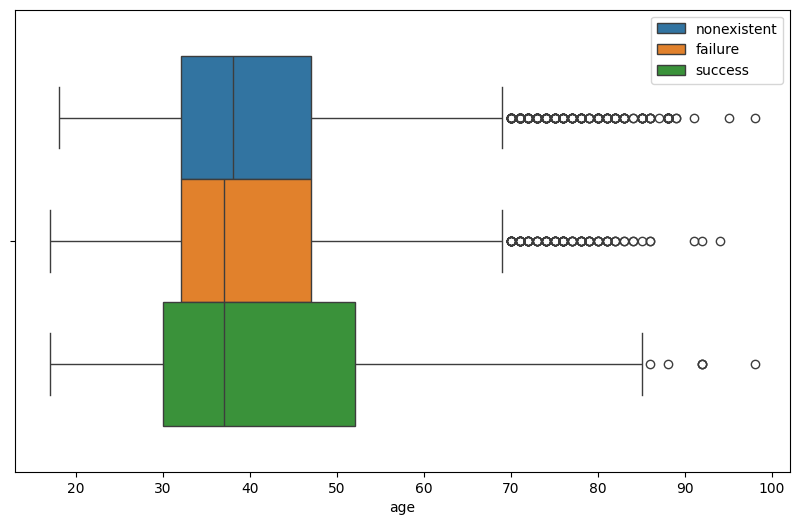

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=main_df,x='age',hue='poutcome')
plt.legend(loc='upper right')

<Axes: xlabel='age', ylabel='duration'>

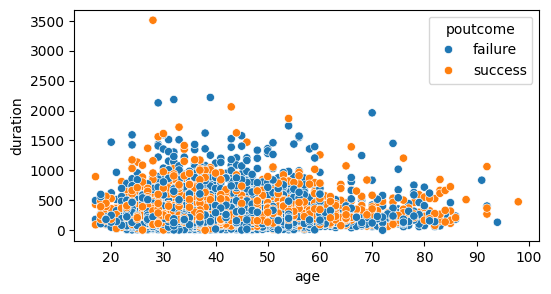

In [26]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=main_df[main_df['poutcome']!='nonexistent'],x='age',y='duration',hue='poutcome')

In [27]:
main_df.groupby('age')['y'].value_counts(normalize=True)

age  y  
17   no     0.600000
     yes    0.400000
18   no     0.571429
     yes    0.428571
19   no     0.523810
              ...   
92   yes    0.750000
     no     0.250000
94   no     1.000000
95   no     1.000000
98   yes    1.000000
Name: proportion, Length: 150, dtype: float64

In [28]:
day_order = ['mon','tue','wed','thu','fri']
temp_df=main_df.groupby('day_of_week')['duration'].mean().reset_index()

In [29]:
round(main_df[main_df['poutcome']!='nonexistent'].groupby(['day_of_week','poutcome'])['duration'].mean())

day_of_week  poutcome
fri          failure     252.0
             success     310.0
mon          failure     229.0
             success     324.0
thu          failure     258.0
             success     325.0
tue          failure     247.0
             success     337.0
wed          failure     255.0
             success     305.0
Name: duration, dtype: float64

havıng a uiversity degree its give us a probabil to no

In [30]:
main_df.groupby('education')['y'].value_counts(normalize=True)

education            y  
basic.4y             no     0.897510
                     yes    0.102490
basic.6y             no     0.917976
                     yes    0.082024
basic.9y             no     0.921754
                     yes    0.078246
high.school          no     0.891645
                     yes    0.108355
illiterate           no     0.777778
                     yes    0.222222
professional.course  no     0.886515
                     yes    0.113485
university.degree    no     0.862755
                     yes    0.137245
unknown              no     0.854997
                     yes    0.145003
Name: proportion, dtype: float64

<Axes: xlabel='education'>

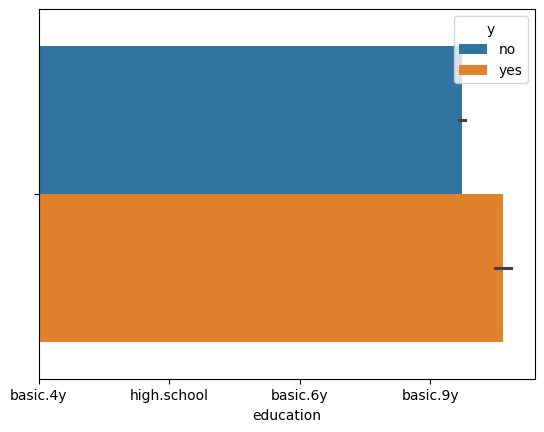

In [31]:
sns.barplot(data=main_df,x='education',hue='y')

In [32]:
main_df['low_interest_rates'] = main_df['euribor3m'].apply(lambda x: x < 3)
main_df['college_grad?'] = main_df['education'].apply(lambda x: x == 'university.degree')

In [33]:
main_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,low_interest_rates,college_grad?
0,56,other,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
1,57,other,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
2,37,other,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False
4,56,other,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,False,False


 NOW WE MUST CREATE OUR trainig and testing datasets (to predict 'y')

In [34]:

include_these_features = ['age', 'job', 'marital', 'default', 'college_grad?', 
                          'housing', 'loan','contact', 'duration', 'low_interest_rates']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = main_df[include_these_features]
y = main_df ['y']


In [37]:
x.head()

,age,job,marital,default,college_grad?,housing,loan,contact,duration,low_interest_rates
0,56,other,married,no,False,no,no,telephone,261,False
1,57,other,married,unknown,False,no,no,telephone,149,False
2,37,other,married,no,False,yes,no,telephone,226,False
3,40,admin.,married,no,False,no,no,telephone,151,False
4,56,other,married,no,False,no,yes,telephone,307,False


In [38]:

x_dummies = pd.get_dummies(x)
x_dummies.info()#23 tane column var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 41188 non-null  int64
 1   college_grad?       41188 non-null  bool 
 2   duration            41188 non-null  int64
 3   low_interest_rates  41188 non-null  bool 
 4   job_admin.          41188 non-null  bool 
 5   job_blue-collar     41188 non-null  bool 
 6   job_other           41188 non-null  bool 
 7   job_technician      41188 non-null  bool 
 8   marital_divorced    41188 non-null  bool 
 9   marital_married     41188 non-null  bool 
 10  marital_single      41188 non-null  bool 
 11  marital_unknown     41188 non-null  bool 
 12  default_no          41188 non-null  bool 
 13  default_unknown     41188 non-null  bool 
 14  default_yes         41188 non-null  bool 
 15  housing_no          41188 non-null  bool 
 16  housing_unknown     41188 non-null  bool

In [39]:
x_dummies = pd.get_dummies(x,drop_first=True)#drop_first hani aynı anlaöa gelen katgori atılır
x_dummies # 17 tane

,age,college_grad?,duration,low_interest_rates,job_blue-collar,job_other,job_technician,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
0,56,False,261,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,57,False,149,False,False,True,False,True,False,False,True,False,False,False,False,False,True
2,37,False,226,False,False,True,False,True,False,False,False,False,False,True,False,False,True
3,40,False,151,False,False,False,False,True,False,False,False,False,False,False,False,False,True
4,56,False,307,False,False,True,False,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,False,334,True,False,True,False,True,False,False,False,False,False,True,False,False,False
41184,46,False,383,True,True,False,False,True,False,False,False,False,False,False,False,False,False
41185,56,True,189,True,False,True,False,True,False,False,False,False,False,True,False,False,False
41186,44,False,442,True,False,False,True,True,False,False,False,False,False,False,False,False,False


In [40]:
x_dummies.corr()

,age,college_grad?,duration,low_interest_rates,job_blue-collar,job_other,job_technician,marital_married,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone
age,1.000000,-0.071138,-0.000866,-0.023501,-0.024191,0.163720,-0.064383,0.271266,-0.411703,0.001062,0.165001,0.001891,-0.001092,-0.001414,-0.001092,-0.007198,0.007021
college_grad?,-0.071138,1.000000,-0.012641,0.022374,-0.336592,0.016517,-0.026327,-0.105645,0.117051,0.008903,-0.142701,-0.005527,-0.005376,0.013840,-0.005376,0.012488,-0.103159
duration,-0.000866,-0.012641,1.000000,0.032868,0.012992,0.007381,-0.013742,-0.004042,0.007808,0.009263,-0.011588,-0.005101,-0.004897,-0.006804,-0.004897,0.000121,-0.026657
low_interest_rates,-0.023501,0.022374,0.032868,1.000000,-0.031069,0.044539,-0.047641,-0.088395,0.110717,0.007968,-0.178110,-0.005959,-0.001837,0.055842,-0.001837,0.001647,-0.386750
job_blue-collar,-0.024191,-0.336592,0.012992,-0.031069,1.000000,-0.402490,-0.238178,0.129272,-0.100192,-0.005251,0.176698,-0.004594,0.006673,-0.016031,0.006673,-0.006127,0.094712
job_other,0.163720,0.016517,0.007381,0.044539,-0.402490,1.000000,-0.330812,0.039298,-0.063870,0.013009,0.009882,-0.000449,0.006945,-0.004624,0.006945,-0.008098,0.008789
job_technician,-0.064383,-0.026327,-0.013742,-0.047641,-0.238178,-0.330812,1.000000,-0.055176,0.057404,-0.001635,-0.069659,0.011601,-0.006459,0.011001,-0.006459,-0.006197,-0.048635
marital_married,0.271266,-0.105645,-0.004042,-0.088395,0.129272,0.039298,-0.055176,1.000000,-0.773785,-0.054622,0.130395,0.006893,-0.003623,-0.010674,-0.003623,-0.001169,0.063648
marital_single,-0.411703,0.117051,0.007808,0.110717,-0.100192,-0.063870,0.057404,-0.773785,1.000000,-0.027569,-0.123565,-0.005334,0.000688,0.014191,0.000688,0.004999,-0.071159
marital_unknown,0.001062,0.008903,0.009263,0.007968,-0.005251,0.013009,-0.001635,-0.054622,-0.027569,1.000000,-0.007732,-0.000377,-0.003323,-0.007627,-0.003323,-0.000208,-0.002543


In [41]:
x_train, x_test, y_train , y_test = train_test_split(x_dummies,y,random_state=46)

In [42]:
y_test.shape

(10297,)

let's builda a model!

In [43]:
from sklearn.linear_model import LogisticRegression


In [45]:
logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


Evaluation
Make predictions on the training set :eğittiğimiz modelle eğitim verisi üzerinde tahmin

Evaluate those train-set predictions:modelin eğitim setindeki tahminlerini kontrol etmek, doğruluğunu ve başarısını

Make predictions on the testing set:modelimizi test verisi üzerinde denemek ve tahminler almak

Evaluate those test-set predictions:modelin test verisi üzerindeki başarısını ölçmek.

In [50]:
train_preds = logreg_model.predict(x_train)
test_preds = logreg_model.predict(x_test)


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

“Evaluation metrics” demek: modelin başarısını ölçmek için kullandığımız yöntemler.

In [61]:
import sklearn
print(sklearn.__version__)




1.7.2


In [64]:
print("training prediction accuracy :")
print (accuracy_score(y_true=y_train,y_pred = train_preds))

print("\n Confusion matrix:")
print(confusion_matrix(y_true=y_train,y_pred=train_preds))

print("\n Classification report")
print(classification_report(y_true = y_train,y_pred=train_preds))



training prediction accuracy :
0.8964423294810786

 Confusion matrix:
[[26772   602]
 [ 2597   920]]

 Classification report
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     27374
         yes       0.60      0.26      0.37      3517

    accuracy                           0.90     30891
   macro avg       0.76      0.62      0.65     30891
weighted avg       0.88      0.90      0.88     30891



Sınıf "no" (almayacak) için Precision 0.91 → Model “no” dediğinde %91 doğru. Recall 0.98 → Gerçekte “no” olanların %98’ini model doğru bulmuş. F1-score 0.94 → Precision ve Recall dengesi çok iyi. Support 27374 → Bu sınıfta 27374 kişi var. Yani: Model “almayacak” dediğinde çok güvenilir ve çoğunu yakalıyor. Sınıf "yes" (alacak) için Precision 0.60 → Model “yes” dediğinde %60 doğru. Recall 0.26 → Gerçekte “yes” olanların sadece %26’sını yakalayabilmiş. F1-score 0.37 → Precision ve Recall dengesi düşük. Support 3517 → Bu sınıfta 3517 kişi var. Yani: Model “alacak” dediğinde çok güvenilir değil ve çoğunu kaçırıyor. Genel Doğruluk (accuracy) 0.90 → %90 doğru tahmin etmiş. Ama dikkat! Accuracy yüksek çünkü sınıflar dengesiz (no = 27374, yes = 3517). Yani model çoğunluk sınıfı iyi tahmin ediyor, azınlığı (yes) kötü tahmin ediyor. Özet günlük dil ile: Model almayacakları çok iyi tahmin ediyor.  Ama alacakları çoğunlukla kaçırıyor.

Terim	Basit Anlamı
Precision	Model dediğinde doğru mu?
Recall	Gerçekte olanları model ne kadar yakaladı?
F1-score	İkisini dengeler, genel başarı
Support	Sınıfta kaç kişi var?

y_train:Modelin öğrendiği veride başarısı

y_test:	Modelin yeni/hiç görmediği veride başarısı

In [65]:
print("testing prediction accuracy:")
print(accuracy_score(y_true=y_test,y_pred=test_preds))

print("\nConfusion matrix:")
print(confusion_matrix(y_true = y_test,y_pred=test_preds))

print("\nClassification report")
print(classification_report(y_true = y_test , y_pred = test_preds))

testing prediction accuracy:
0.8980285520054385

Confusion matrix:
[[8969  205]
 [ 845  278]]

Classification report
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9174
         yes       0.58      0.25      0.35      1123

    accuracy                           0.90     10297
   macro avg       0.74      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297




Generate a quick baseline/bir referans doğruluk oluştur, buna göre modelini değerlendir

In [66]:

#the model would be 89% accurate if it simply guessed "no" for everything
y_test.value_counts()

y
no     9174
yes    1123
Name: count, dtype: int64